0

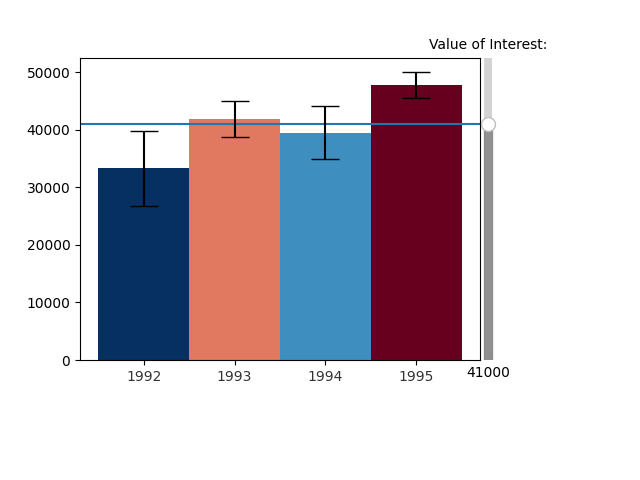

In [9]:
%matplotlib widget

import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.widgets import Slider
import scipy.stats as st
import pandas as pd
import numpy as np

def val_update(val):
    y_val = slider.val
    y_line1.set_ydata(y_val)
    for bar_artist in bar_year:
        bar_artist[1].set_color(cmap(get_prob(y_val, bar_artist[0])))
    

def get_err(year):
    '''Get margin of errror for CI represented by bar(yerr=)'''
    std = dt[year].loc['std']
    mean = dt[year].loc['mean']
    sample = dt[year].loc['count']
    z = 1.96
    err = z * (std / (np.sqrt(sample)))
    return err

def get_prob(user_y, year):
    '''Calculate probability  '''
    mean = dt[year].loc['mean']
    prob_dens = get_err(year)
    z = (user_y - mean) / (prob_dens * 0.375)
    prob = st.norm.cdf(z)
    return prob


#---DataFrame---#

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

dt = df.T.describe()

years = list(dt.columns)
pos = np.arange(len(years))
x_data = list(zip(pos,years))
cmap = plt.cm.RdBu


#---Widget and plotting---#

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25, right=.75)
ticks = ax.set_xticks(pos)
labels = ax.set_xticklabels(years, alpha=.8)

axslider = plt.axes([0.75, 0.25, 0.025, 0.63])

slider = Slider(axslider, 'Value of Interest:', 
                 valmin=0, valmax=52507, 
                 valinit=41000, valstep=1,
                 valfmt='%0.0f', orientation='vertical', alpha=.8)

slider.poly.set_color("grey")
axslider.lines[0].set_visible(False)

y_line1 = ax.axhline(slider.val)


bars = [ax.bar(pos, dt[year].loc["mean"], 
               yerr=get_err(year), width = 1, 
               capsize=10, color=cmap(get_prob(slider.val, year)))\
        for pos, year in x_data]

bar_artists = [bar.get_children()[0] for bar in bars]
bar_year = list(zip(years, bar_artists))
slider.on_changed(val_update)
